In [1]:
#Install sentence_transformers pandas torch
! pip install sentence_transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 2.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 11.0 MB/s eta 0:00:00
  Created wheel for sentence_transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125923 sha256=15ddfbb01bec9866817b303359e30e63459118d203b2af95822d0f3192bd3f90
  Stored in directory: /root/.cache/pip/wheels/62/f2/10/1e606fd5f02395388f74e7462910fe851042f97238cbbd902f
Successfully built sentence_transformers


In [2]:
#Pyvis Installation
! pip install pyvis

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 756.0/756.0 kB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 12.7 MB/s eta 0:00:00


In [3]:
#Import Required Libraries
import pandas as pd
import numpy as np
from sentence_transformers import SentenceTransformer, util
import networkx as nx
import matplotlib.pyplot as plt
from pyvis.network import Network
from IPython.display import HTML

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
#load the dataset
df = pd.read_json("/content/drive/MyDrive/BERT/data000000000000.json",lines=True)

In [7]:
df.head()

,publication_number,abstract,application_number,description
0,US-2014326193-A1,the invention provides a method and system for...,US-201414268255-A,reference will now be made in detail to embodi...
1,US-5035913-A,the invention comprises a process for preparin...,US-41104089-A,steel cut oats are well known in the industry ...
2,US-2010216602-A1,this trunk rotation device uses dynamic moveme...,US-66191810-A,the trunk rotation conditioning device of this...
3,US-4406827-A,a cohesive nonsticky electrically conductive g...,US-7223079-A,the present invention provides an electrolyte ...
4,US-4318704-A,a log rolling apparatus includes a body having...,US-21058180-A,with reference now to the drawings and in part...


In [8]:
#conacatinate abstract and discription features and drop them
df['text'] = df['abstract'].astype(str) + df['description']

In [9]:
ready_df = df

In [10]:
ready_df.head()

,publication_number,abstract,application_number,description,text
0,US-2014326193-A1,the invention provides a method and system for...,US-201414268255-A,reference will now be made in detail to embodi...,the invention provides a method and system for...
1,US-5035913-A,the invention comprises a process for preparin...,US-41104089-A,steel cut oats are well known in the industry ...,the invention comprises a process for preparin...
2,US-2010216602-A1,this trunk rotation device uses dynamic moveme...,US-66191810-A,the trunk rotation conditioning device of this...,this trunk rotation device uses dynamic moveme...
3,US-4406827-A,a cohesive nonsticky electrically conductive g...,US-7223079-A,the present invention provides an electrolyte ...,a cohesive nonsticky electrically conductive g...
4,US-4318704-A,a log rolling apparatus includes a body having...,US-21058180-A,with reference now to the drawings and in part...,a log rolling apparatus includes a body having...


In [11]:
model = SentenceTransformer("AI-Growth-Lab/PatentSBERTa")

.gitattributes:   0%|          | 0.00/1.18k [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/3.88k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/671 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/438M [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/440 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

In [12]:
# Extract the 'text' column from dataset
texts = ready_df['text'].tolist()


In [13]:
# Encode the texts to obtain sentence embeddings
sentence_embeddings = model.encode(texts)

In [14]:
#embendings of text columns wich is abstract and description
sentence_embeddings

array([[ 0.3919537 , -0.50593567, -0.28509763, ..., -0.21441825,
         0.10811079, -0.36449414],
       [-0.15289357, -0.8080883 , -0.06253442, ..., -0.20311874,
        -0.24858391, -0.19535947],
       [-0.00237058, -0.59702766, -0.08141451, ...,  0.15446275,
        -0.34000546, -0.5006786 ],
       ...,
       [ 0.17629659, -0.7465867 , -0.07403925, ..., -0.23791657,
         0.11894958, -0.40527838],
       [-0.01017017, -0.60478914, -0.11700139, ..., -0.12295134,
        -0.3189593 , -0.349447  ],
       [ 0.11944351, -0.09121367, -0.11512752, ...,  0.19020551,
        -0.01602927, -0.34052184]], dtype=float32)

In [15]:
# take example for finding similar sentences
query_text = ready_df['text'][0]
# Encode the example text
query_embedding = model.encode(query_text)

In [16]:
# Use cosine similarity to find the most similar sentences
cosine_scores = util.pytorch_cos_sim(query_embedding, sentence_embeddings)[0]

In [17]:
# Create a DataFrame with 'id', 'text', and 'similarity_score' columns
result_df = pd.DataFrame({
    'publication_number': ready_df['publication_number'],
    'abstract' : ready_df['abstract'],
    'application_number': ready_df['application_number'],
    'description': ready_df['description'],
    'similarity_score': cosine_scores.tolist()
})

# Sort the DataFrame by similarity scores in descending order
result_df= result_df.sort_values(by='similarity_score', ascending=False)

In [18]:
#results for one text example
result_df.head()

,publication_number,abstract,application_number,description,similarity_score
0,US-2014326193-A1,the invention provides a method and system for...,US-201414268255-A,reference will now be made in detail to embodi...,1.000000
23,US-2012209151-A1,an electronic skin treatment device with an in...,US-201213396381-A,while the present invention may be embodied in...,0.692031
45,US-2015258347-A1,the present invention relates to the fields of...,US-201514727858-A,other objects and advantages of the present in...,0.658545
10,US-2012260392-A1,"disclosed are knee pad assemblies , methods an...",US-201213447182-A,"in the following descriptions , the present in...",0.629735
15,US-5881745-A,a dental floss apparatus generally comprising ...,US-12217598-A,"referring more specifically to the drawings , ...",0.609847


In [19]:
#This line selects the top 10 records with the highest similarity scores from the DataFrame df_claim_cpc_result.
final_df = result_df.nlargest(10, ['similarity_score'])

In [20]:
final_df

,publication_number,abstract,application_number,description,similarity_score
0,US-2014326193-A1,the invention provides a method and system for...,US-201414268255-A,reference will now be made in detail to embodi...,1.000000
23,US-2012209151-A1,an electronic skin treatment device with an in...,US-201213396381-A,while the present invention may be embodied in...,0.692031
45,US-2015258347-A1,the present invention relates to the fields of...,US-201514727858-A,other objects and advantages of the present in...,0.658545
10,US-2012260392-A1,"disclosed are knee pad assemblies , methods an...",US-201213447182-A,"in the following descriptions , the present in...",0.629735
15,US-5881745-A,a dental floss apparatus generally comprising ...,US-12217598-A,"referring more specifically to the drawings , ...",0.609847
38,US-2014313322-A1,this disclosure provides a stand alone electro...,US-201414204219-A,the preferred embodiments of the instant inven...,0.605635
34,US-2008091276-A1,a prosthesis for repairing a hernia includes a...,US-95102707-A,any feature or combination of features describ...,0.599329
35,US-2013001143-A1,"inner and outer containers , telescoped togeth...",US-201113175562-A,referring now in more detail to the exemplary ...,0.597226
27,US-5376004-A,a dental implant device for mounting a prosthe...,US-15436793-A,referring now to fig1 where the preferred embo...,0.575282
42,US-8218143-B2,a method of detecting oxygen and / or chemical...,US-68746910-A,the embodiments of the invention and the vario...,0.570203


## **Visulisation**

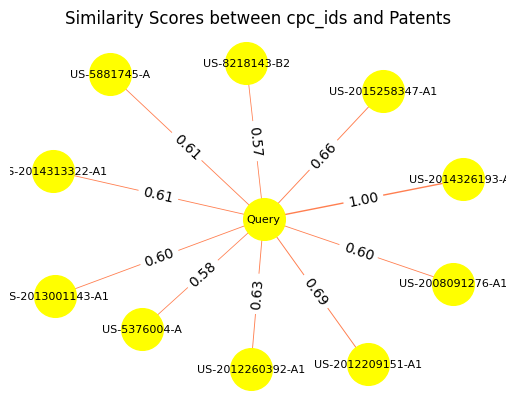

,publication_number,application_number,text,similarity_score
0,US-2014326193-A1,US-201414268255-A,the invention provides a method and system for...,1.000000
23,US-2012209151-A1,US-201213396381-A,an electronic skin treatment device with an in...,0.692031
45,US-2015258347-A1,US-201514727858-A,the present invention relates to the fields of...,0.658545
10,US-2012260392-A1,US-201213447182-A,"disclosed are knee pad assemblies , methods an...",0.629735
15,US-5881745-A,US-12217598-A,a dental floss apparatus generally comprising ...,0.609847
38,US-2014313322-A1,US-201414204219-A,this disclosure provides a stand alone electro...,0.605635
34,US-2008091276-A1,US-95102707-A,a prosthesis for repairing a hernia includes a...,0.599329
35,US-2013001143-A1,US-201113175562-A,"inner and outer containers , telescoped togeth...",0.597226
27,US-5376004-A,US-15436793-A,a dental implant device for mounting a prosthe...,0.575282
42,US-8218143-B2,US-68746910-A,a method of detecting oxygen and / or chemical...,0.570203


In [ ]:
# Create a directed graph
G = nx.DiGraph()

# Add nodes and edges based on similarity scores
for i in range(len(final_df)):
    pub_num = final_df.iloc[i]['publication_number']
    app_num = final_df.iloc[i]['application_number']
    similarity_score = final_df.iloc[i]['similarity_score']
    sentence = final_df.iloc[i]['text']

    G.add_node(pub_num, label=f"pub_num {pub_num}\napp_num {app_num}\nSimilarity {similarity_score:.4f}")

    # # Connect nodes with directed edges based on similarity score
    G.add_edge("Query",pub_num, weight=similarity_score)

# Draw the graph using a force-directed layout
pos = nx.spring_layout(G)

# Extract edge weights for visualization
edge_weights = [G[u][v]['weight'] for u, v in G.edges()]

# Draw nodes, edges, and labels
nx.draw_networkx_nodes(G, pos, node_size=900, node_color="yellow")
nx.draw_networkx_edges(G, pos, width=edge_weights, edge_color="coral", alpha=1)
nx.draw_networkx_labels(G, pos, font_size=8, font_color="black")

# Display edge weights on the graph
edge_labels = {(u, v): f"{G[u][v]['weight']:.2f}" for u, v in G.edges()}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)



# Show the graph
plt.title("Similarity Scores between cpc_ids and Patents")
plt.axis("off")
plt.show()
final_df

In [ ]:
# Extracting necessary columns for visualization
data = final_df[['publication_number', 'application_number', 'similarity_score']]

# Create a directed graph
G = nx.DiGraph()

# Add nodes and edges based on similarity scores
for i in range(len(data)):
    pub_num = data.iloc[i]['publication_number']
    app_num = data.iloc[i]['application_number']
    similarity_score = data.iloc[i]['similarity_score']

    G.add_node(app_num, label=f"Pub_num {pub_num}\nSimilarity {similarity_score:.4f}")
    G.add_edge("Query", app_num, value=similarity_score)

# Create a Pyvis network
pyvis_network = Network(notebook=True,cdn_resources='remote')
pyvis_network.from_nx(G)

# Save the Pyvis network as an HTML file
html_file_path = '/content/drive/MyDrive/us_app/abstarct.html'
pyvis_network.show(html_file_path)

# Display the Pyvis network
pyvis_network.show(html_file_path)

# Display the web diagram in Colab
with open(html_file_path, 'r') as file:
    html_content = file.read()

HTML(html_content)

/content/drive/MyDrive/us_app/abstarct.html
/content/drive/MyDrive/us_app/abstarct.html
